# TASK-1

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Generate Simple Linear Regression Dataset and adding Noise

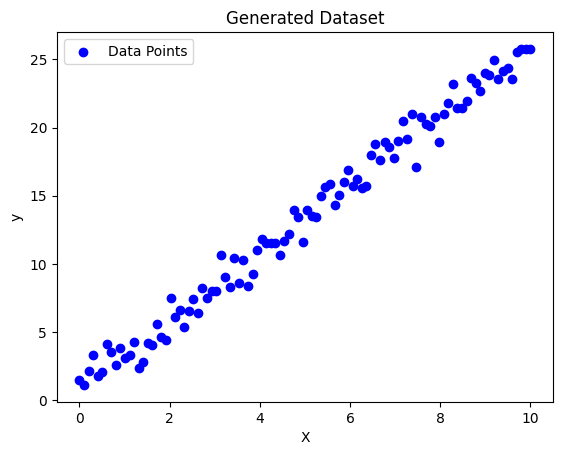

In [2]:
# Parameters
np.random.seed(42)
n_samples = 100
m_true = 2.5            # True slope
c_true = 1.0            # True intercept
noise_std = 1.0         # Standard deviation of noise

# Generate data
X = np.linspace(0, 10, n_samples)
y = m_true * X + c_true + np.random.normal(0, noise_std, n_samples)

# Plot data
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.legend()
plt.show()

### Analyze with 2-D Graph and built-in linear regression

In [3]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.3, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients
m_inbuilt = model.coef_[0]
c_inbuilt = model.intercept_

print(f'In-built Method: m = {m_inbuilt:.2f}, c = {c_inbuilt:.2f}')

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}')

In-built Method: m = 2.51, c = 0.81
MAE: 0.58, RMSE: 0.74, R2 Score: 0.99


## Using Gradient Descent

In [4]:
# Gradient Descent Parameters
learning_rate = 0.01
n_epochs = 1000

# Initialize coefficients
m = 0.0
c = 0.0

# Gradient Descent
def compute_gradients(X, y, m, c):
    N = len(y)
    y_pred = m * X + c
    error = y_pred - y
    dm = (2 / N) * np.sum(error * X)
    dc = (2 / N) * np.sum(error)
    return dm, dc

def compute_loss(X, y, m, c):
    y_pred = m * X + c
    return np.mean((y - y_pred) ** 2)

loss_history = []

for epoch in range(n_epochs):
    dm, dc = compute_gradients(X_train.flatten(), y_train, m, c)
    m -= learning_rate * dm
    c -= learning_rate * dc
    loss = compute_loss(X_train.flatten(), y_train, m, c)
    loss_history.append(loss)

print(f'Gradient Descent Method: m = {m:.2f}, c = {c:.2f}')

# Predict on test data
y_pred_gd = m * X_test.flatten() + c

# Evaluate
mae_gd = mean_absolute_error(y_test, y_pred_gd)
rmse_gd = np.sqrt(mean_squared_error(y_test, y_pred_gd))
r2_gd = r2_score(y_test, y_pred_gd)

print(f'MAE (GD): {mae_gd:.2f}, RMSE (GD): {rmse_gd:.2f}, R2 Score (GD): {r2_gd:.2f}')


Gradient Descent Method: m = 2.51, c = 0.80
MAE (GD): 0.58, RMSE (GD): 0.74, R2 Score (GD): 0.99


## Plot Linear regression

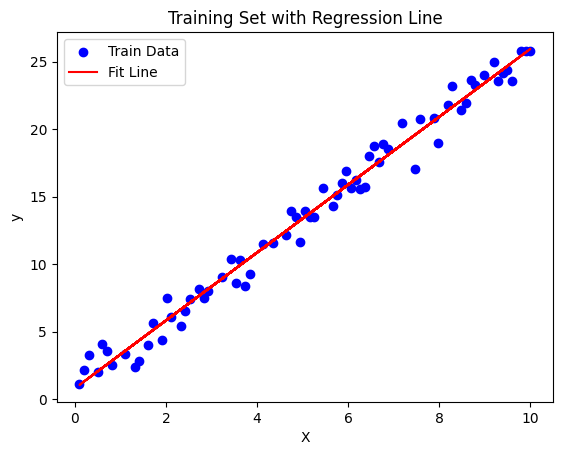

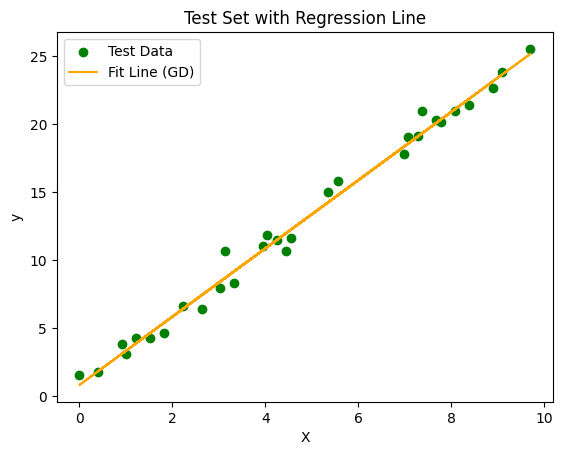

In [5]:
# Plot regression line for training set
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, m * X_train.flatten() + c, color='red', label='Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Set with Regression Line')
plt.legend()
plt.show()

# Plot regression line for test set
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred_gd, color='orange', label='Fit Line (GD)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Set with Regression Line')
plt.legend()
plt.show()


## Plot Line Fitted on Train Set After Each Epoch

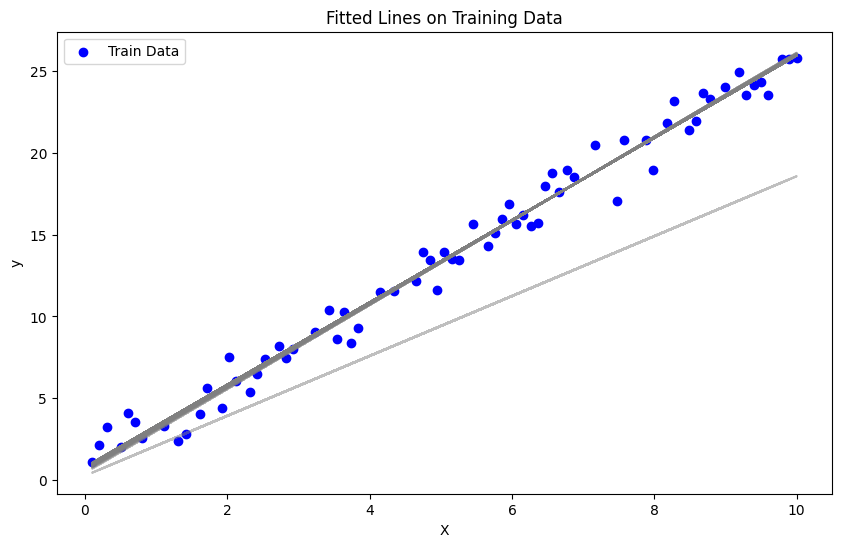

In [6]:
plt.figure(figsize=(10, 6))
for epoch in range(0, n_epochs, int(n_epochs / 30)):
    m_temp = 0.0
    c_temp = 0.0
    for ep in range(epoch + 1):
        dm, dc = compute_gradients(X_train.flatten(), y_train, m_temp, c_temp)
        m_temp -= learning_rate * dm
        c_temp -= learning_rate * dc
    plt.plot(X_train, m_temp * X_train.flatten() + c_temp, color='grey', alpha=0.5)

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Lines on Training Data')
plt.legend()
plt.show()


## 3D Plot of Loss vs. m and c

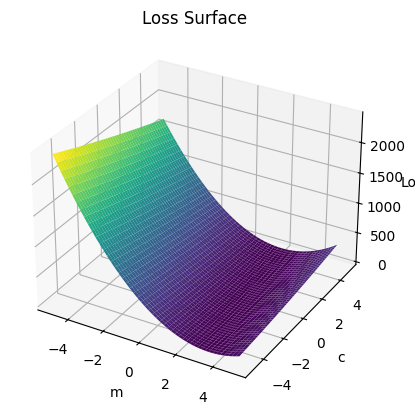

In [7]:
m_range = np.linspace(-5, 5, 50)
c_range = np.linspace(-5, 5, 50)
M, C = np.meshgrid(m_range, c_range)
loss = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        loss[i, j] = compute_loss(X_train.flatten(), y_train, M[i, j], C[i, j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, loss, cmap='viridis')
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface')
plt.show()
